In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#dfs = pd.read_csv('~/Downloads/health.csv')
budget = pd.read_csv('usa-education-budget-analysis_zip/data/budget_csv.csv')
data = pd.read_csv('usa-education-budget-analysis_zip/data/data_csv.csv')

In [6]:
budget.head()
#sns.lineplot(data=budget, x='Year', y='Value')

,Name,Year,Value
0,Legislative Branch,1976,936.0
1,Legislative Branch,1977,1057.0
2,Legislative Branch,1978,1087.0
3,Legislative Branch,1979,1131.0
4,Legislative Branch,1980,1318.0


In [7]:
data.head()

,YEAR,BUDGET_ON_EDUCATION,GDP,RATIO
0,1976,9314.0,1877587.0,0.496
1,1977,10568.0,2085951.0,0.507
2,1978,11625.0,2356571.0,0.493
3,1979,13996.0,2632143.0,0.532
4,1980,15209.0,2862505.0,0.531


In [8]:
#budget.groupby("Year").sum()
budget['Name'].unique()

array(['Legislative Branch', 'Judicial Branch',
       'Department of Agriculture', 'Department of Commerce',
       'Department of Defense--Military Programs',
       'Department of Education', 'Department of Energy',
       'Department of Health and Human Services',
       'Department of Homeland Security',
       'Department of Housing and Urban Development',
       'Department of the Interior', 'Department of Justice',
       'Department of Labor', 'Department of State',
       'Department of Transportation', 'Department of the Treasury',
       'Department of Veterans Affairs',
       'Corps of Engineers--Civil Works', 'Other Defense Civil Programs',
       'Environmental Protection Agency',
       'Executive Office of the President',
       'General Services Administration',
       'International Assistance Programs',
       'National Aeronautics and Space Administration',
       'National Science Foundation', 'Office of Personnel Management',
       'Small Business Administratio

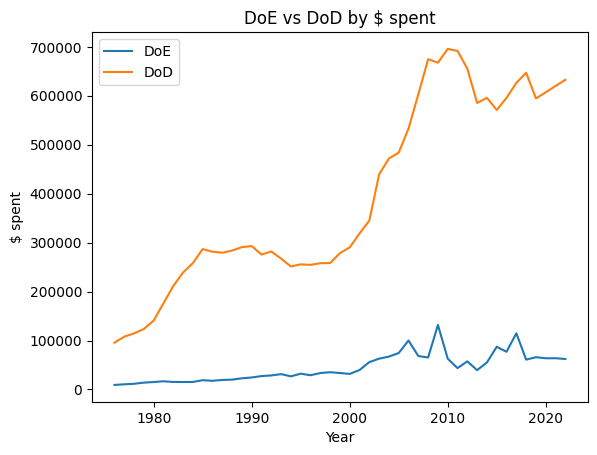

In [109]:
fig, ax = plt.subplots()
education = budget[budget['Name'] == 'Department of Education']
sns.lineplot(data=education, x='Year', y='Value', label='DoE')
defense = budget[budget['Name'] == 'Department of Defense--Military Programs']
sns.lineplot(data=defense, x='Year', y='Value', ax=ax, label='DoD')
ax.set_ylabel("$ spent")
ax.set_title("DoE vs DoD by $ spent");
#sns.lineplot(data=data, x='YEAR', y='GDP', ax=ax)
plt.savefig('DoE vs DoD by $ spent.png')

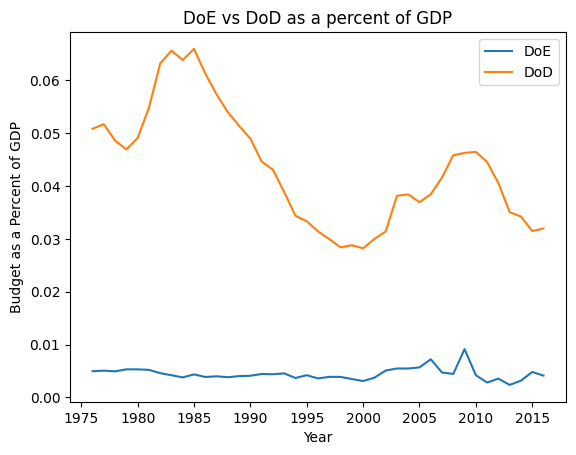

In [110]:
fig, ax = plt.subplots()
education = budget[budget['Name'] == 'Department of Education']
education = education.merge(data, left_on='Year', right_on='YEAR')
education['Percent'] = education['Value'] / education['GDP']
sns.lineplot(data=education, x='Year', y='Percent', label='DoE')
defense = budget[budget['Name'] == 'Department of Defense--Military Programs']
defense = defense.merge(data, left_on='Year', right_on='YEAR')
defense['Percent'] = defense['Value'] / defense['GDP']
sns.lineplot(data=defense, x='Year', y='Percent', ax=ax, label='DoD')
ax.set_title("DoE vs DoD as a percent of GDP")
ax.set_ylabel("Budget as a Percent of GDP");
#sns.lineplot(data=data, x='YEAR', y='GDP', ax=ax)
plt.savefig('DoE vs DoD as a percent of GDP.png')

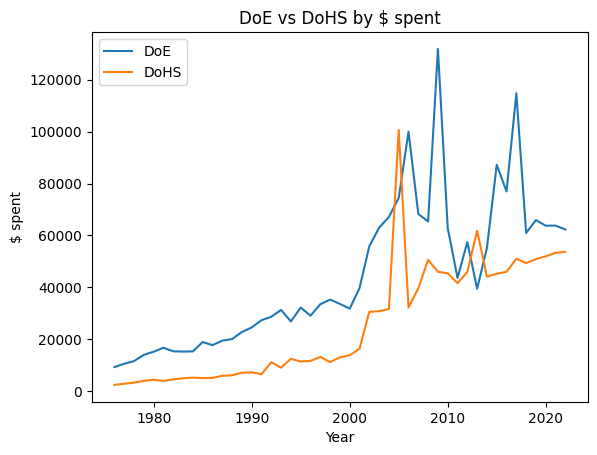

In [111]:
fig, ax = plt.subplots()
education = budget[budget['Name'] == 'Department of Education']
sns.lineplot(data=education, x='Year', y='Value', label='DoE')
defense = budget[budget['Name'] == 'Department of Homeland Security']
sns.lineplot(data=defense, x='Year', y='Value', ax=ax, label='DoHS')
ax.legend(loc='upper left')
ax.set_ylabel("$ spent")
ax.set_title("DoE vs DoHS by $ spent");
#sns.lineplot(data=data, x='YEAR', y='GDP', ax=ax)
plt.savefig("DoE vs DoHS by $ spent")

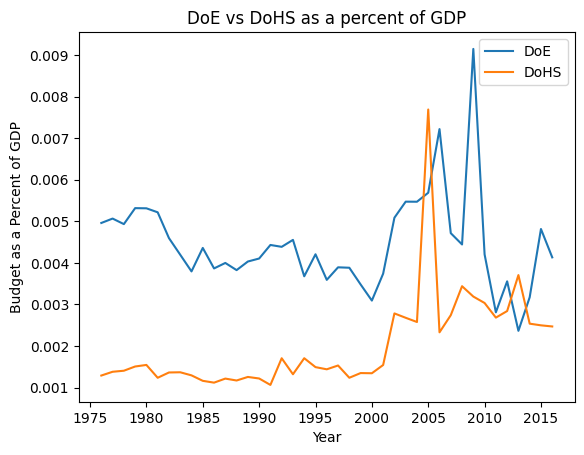

In [112]:
fig, ax = plt.subplots()
education = budget[budget['Name'] == 'Department of Education']
education = education.merge(data, left_on='Year', right_on='YEAR')
education['Percent'] = education['Value'] / education['GDP']
sns.lineplot(data=education, x='Year', y='Percent', label='DoE')
defense = budget[budget['Name'] == 'Department of Homeland Security']
defense = defense.merge(data, left_on='Year', right_on='YEAR')
defense['Percent'] = defense['Value'] / defense['GDP']
sns.lineplot(data=defense, x='Year', y='Percent', ax=ax, label='DoHS')
ax.set_title("DoE vs DoHS as a percent of GDP")
ax.set_ylabel("Budget as a Percent of GDP");
#sns.lineplot(data=data, x='YEAR', y='GDP', ax=ax)
plt.savefig("DoE vs DoHS as a percent of GDP")


In [102]:
def make_pretty(styler):
    styler.set_caption("Median US Department's Budget (1976-2022)")
    styler.background_gradient(axis=None, vmin=-33643, vmax=50000, cmap="YlGnBu")
    return styler

table = budget.drop(columns=["Year"])
table = table.groupby("Name").median().sort_values(by="Value")
table = table.reset_index()
table.style.set_caption("Median US Department's Budget (1976-2022)")
table.style.pipe(make_pretty)

,Name,Value
0,Undistributed Offsetting Receipts,-161034.000000
1,(On-budget),-105586.000000
2,Allowances,-84595.500000
3,(Off-budget),-59455.000000
4,Executive Office of the President,272.000000
5,General Services Administration,340.000000
6,Small Business Administration,838.000000
7,Other Independent Agencies (Off-Budget),2247.000000
8,Legislative Branch,2800.000000
9,National Science Foundation,3702.000000
